In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Trading Evolved/Chapter 6 Pandas/sp500.csv', index_col='Date', parse_dates=['Date'])

In [3]:
data.tail(10)

,SP500
Date,
2018-07-20,2801.83
2018-07-23,2806.98
2018-07-24,2820.40
2018-07-25,2846.07
2018-07-26,2837.44
2018-07-27,2818.82
2018-07-30,2802.60
2018-07-31,2816.29
2018-08-01,2813.36


In [4]:
# SMA using pandas
data['SMA50'] = data['SP500'].rolling(50).mean()
data['SMA100'] = data['SP500'].rolling(100).mean()

In [5]:
# Set position
# If SMA50 > SMA100, position = 1 and we go long
# Else, position = 0 and we do not hold a position
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)

In [6]:
# Position reflects the previous condition of the crossover
data['Position'] = data['Position'].shift()

In [7]:
# Percent change times the position
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']

In [8]:
# Cumulative percent change
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

In [9]:
# Cumulative percent change for buy and hold strategy
data['BuyHold'] = (data['SP500'].pct_change(1) + 1).cumprod()

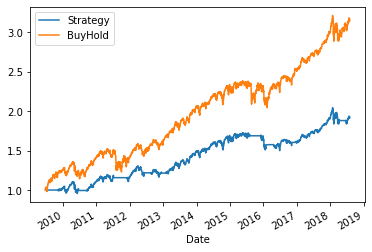

In [10]:
data[['Strategy', 'BuyHold']].plot()

In [11]:
data.tail(10)

,SP500,SMA50,SMA100,Position,StrategyPct,Strategy,BuyHold
Date,,,,,,,
2018-07-20,2801.83,2751.3244,2713.9039,1.0,-0.000948,1.905794,3.130187
2018-07-23,2806.98,2753.0026,2714.8354,1.0,0.001838,1.909297,3.135940
2018-07-24,2820.40,2754.8562,2716.2627,1.0,0.004781,1.918425,3.150933
2018-07-25,2846.07,2757.1750,2717.8109,1.0,0.009102,1.935886,3.179611
2018-07-26,2837.44,2759.6948,2718.9759,1.0,-0.003032,1.930015,3.169970
2018-07-27,2818.82,2761.6220,2719.8829,1.0,-0.006562,1.917350,3.149168
2018-07-30,2802.60,2763.2714,2720.6409,1.0,-0.005754,1.906317,3.131047
2018-07-31,2816.29,2765.3378,2721.4141,1.0,0.004885,1.915629,3.146341
2018-08-01,2813.36,2766.9448,2721.6820,1.0,-0.001040,1.913636,3.143068
